# Coding Assigment 2


## Part 1 - The Fibbonacci Sequence


<img src="img/fibonacci-sequence.jpg" width=25%>

<center>The Fibbonacci Sequrence is defined as: </center>
    
<center>$F_n = F_{n-1} + F_{n-2}$</center>

<div class="alert alert-success">  
"
    
- Fibonacci numbers are named after Italian mathematician Leonardo of Pisa, later known as Fibonacci. They appear to have first arisen as early as 200 BC in work by Pingala on enumerating possible patterns of poetry formed from syllables of two lengths. In his 1202 book Liber Abaci, Fibonacci introduced the sequence to Western European mathematics,although the sequence had been described earlier in Indian mathematics.

- Fibonacci numbers appear unexpectedly often in mathematics, so much so that there is an entire journal dedicated to their study, the Fibonacci Quarterly. Applications of Fibonacci numbers include computer algorithms such as the Fibonacci search technique and the Fibonacci heap data structure, and graphs called Fibonacci cubes used for interconnecting parallel and distributed systems.

- They also appear in biological settings, such as branching in trees, the arrangement of leaves on a stem, the fruit sprouts of a pineapple, the flowering of an artichoke, an uncurling fern and the arrangement of a pine cone's bracts. "

-https://en.wikipedia.org/wiki/Fibonacci_number</div>

Using `while` loop(s), write a statement that calculates and prints out the first 20 numbers in the Fibbonacci Sequence

In [1]:
# YOUR CODE HERE
#Code Structure: https://www.tutorialgateway.org/python-fibonacci-series-program/

length = 20 #establish length for sequence 
i = 0 #create initial value for while loop
val_1 = 0
val_2 = 1

while(i < length):
          if(i <= 1):
                  next_num = i #Displays 0 then 1 after i becomes 2 due to i + 1 condition at the end
        
          else: 
                next_num = val_1 + val_2
                val_1 = val_2
                val_2 = next_num
          print(next_num)
          i = i + 1 #each iteration of if becomes next_num in subsequent sequence 
            
         

0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


## Part 2 - The Pearson Correlation

### A correlation is a statistical procedure that tests for a mutual linear relationship between two lists of data.

<div class="alert alert-success">
    
- Let's test for a linear relationship between Cannabis use, glutamate, and functional connectivity to cortical brain areas. We'll answer the question, "Does how high you are correlate with functional connectivity between areas of the brain?".  

- If you are interested, you can read the complete paper here:
    - Mason, Natasha L., Eef L. Theunissen, Nadia RPW Hutten, H. Y. Desmond, Stefan W. Toennes, Peter Stiers, and Johannes G. Ramaekers. "Cannabis induced increase in striatal glutamate associated with loss of functional corticostriatal connectivity." European Neuropsychopharmacology 29, no. 2 (2019): 247-256.
</div>

<div class="alert alert-warning">

The study has two groups. Full dose (300 μg/kg) group and placebo group in a double-blind crossover design.  After administering treatment, participants performed an attention task in the fMRI scanner. Blood tests measured THC levels and neurotransmitter levels. A questionnaire assessed 'subjective high' scores.  

Our variables of interest for this analysis are 'subjective high' and functional connectiveity in the left NAc (Nucleus Accumbans) in the test group.

First we'll simulate some data....
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## Let's pretend that the subjective high is on average is 4.20 on a scale from 1-7.
## Let's pretend that on average the NAc has 18.7 units of functional connectivity

mean = [4.20, 18.7]  # These are the means we wrote above
cov = [[1, -0.975], [-0.975, 1]] # This is a covariance matrix. # Here we specify the correlation between subjective
                                 # high and NAc functional connectivityas noted in Mason et al (2019)

## Let's pick a sample size of 100
num_samples = 100

## Simulate the data
subjective_high, functional_connectivity = np.random.multivariate_normal(mean, cov, size=num_samples).T # we give the function the means, 
                                                                                                        # the covariance matrix,
                                                                                                        # and the sample size
print('Subjective High', subjective_high[:10])
print('Functional Connectivity', functional_connectivity[:10])

Subjective High [5.21622911 5.80204857 4.32147534 4.58467093 3.87372915 4.09743024
 3.12286262 5.10769814 2.87621455 3.827386  ]
Functional Connectivity [17.87266949 17.12950331 18.75410946 18.5598349  19.18935131 18.75015749
 19.63710528 17.80653708 20.27309383 18.74020072]


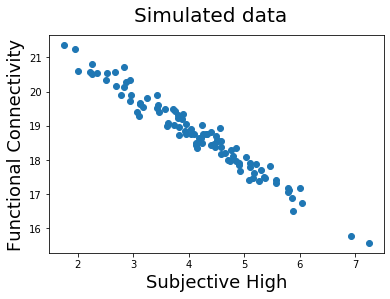

In [3]:
## Plot the data to see if it looks right
fig = plt.figure()
plt.plot(subjective_high, functional_connectivity, 'o')
fig.suptitle('Simulated data', fontsize=20)
plt.xlabel('Subjective High', fontsize=18)
plt.ylabel('Functional Connectivity', fontsize=18)
plt.show()

## Now the challenge begins.  Here is the formula for a correlation:

$
r = \frac{{}n\sum (xy)-\sum(x)\sum(y)}
	{\sqrt{[n\sum (x^2) -  (\sum x)^2] [n\sum (y^2) -  (\sum y)^2]}}
$

Recall that $\sum$ symbol means sum, so $\sum (x)$ means add up all of the items in the list caled x.  $\sum (xy)$ means add up all of the products of each x and corresponding y value in the x and y lists.  Here x is `subjective_high` and y is `functional_connectivity`

### Use `for` loops to calculate the following variables:
- sumx = sum of x
- sumy = sum of y

In [4]:
#Source Code for For Loops: https://stackoverflow.com/questions/23309657/python-total-sum-of-a-list-of-numbers-with-the-for-loop/23309832
sumx = 0
for i in range(0,len(subjective_high)):
    sumx = sumx+subjective_high[i]
print(sumx)

sumy = 0
for i in range(0, len(functional_connectivity)):
    sumy = sumy+functional_connectivity[i]
print(sumy)    

416.0370602252446
1874.890542236843


### Using `for` loop(s), calculate:
- sum_xy = sum of $xy$
- sum_xsquared = sum of $x^2$
- sum_ysquared = sum of $y^2$

In [5]:
#Sum of X squared
sum_xsquared = 0 
for i in range(0,len(subjective_high)):
               s2=subjective_high[i]**2
               sum_xsquared = sum_xsquared + s2
print(sum_xsquared)  

#Sum of Y Squared
sum_ysquared = 0 
for i in range(0,len(functional_connectivity)):
               s22=functional_connectivity[i]**2
               sum_ysquared = sum_ysquared + s22
print(sum_ysquared)

#Sum of XY
#Create function to multiply each x(subjective high) and y(functional connectivity)
def multiply_lists(list1, list2):
    if len(list1) == len(list2):
        length = len(list1)
        products = []
        for i in range(length):
            product = list1[i] * list2[i]
            product = float(product)
            products.append(product)
        return products

for_sumxy = multiply_lists(subjective_high, functional_connectivity)
#print(for_sumxy)

sum_xy = 0
for i in range(0,len(for_sumxy)):
    sum_xy = sum_xy+for_sumxy[i]
print(sum_xy)                    

1853.800441447217
35285.45926574837
7674.736054566912


### Now plug all those numbers into the equation in these 3 steps:

1) numerator = $n(sum(xy)) - sum(x)*sum(y)  $  
2) denominator = $[(n(sum(x^2)) - (sum(x))^2) * (n(sum(y^2)) - (sum(y))^2)]^\frac{1}{2}  $  
3) r = $numerator / denominator$  

In [6]:
## Your code here
numerator = (num_samples*(sum_xy) - (sumx*sumy))


denominator_squared = ((num_samples*sum_xsquared - (sumx**2)) * (num_samples*sum_ysquared - (sumy**2)))


denominator = ((denominator_squared)**(1/2))


r = (numerator/denominator)

print(r)

np.corrcoef(subjective_high, functional_connectivity) #Check of manual correlation with function 

-0.9803596518007212


array([[ 1.        , -0.98035965],
       [-0.98035965,  1.        ]])

### Use this table and `if` and `print` statements to calculate how strong the relationship is and display it to the user

r value = 	
+.70 or higher: 	Very strong positive relationship  
+.40 to +.69: 	Strong positive relationship  
+.30 to +.39: 	Moderate positive relationship  
+.20 to +.29: 	weak positive relationship  
+.01 to +.19: 	No or negligible relationship  
0: 	No relationship [zero correlation]  
-.01 to -.19: 	No or negligible relationship  
-.20 to -.29: 	weak negative relationship  
-.30 to -.39: 	Moderate negative relationship  
-.40 to -.69: 	Strong negative relationship  
-.70 or higher: 	Very strong negative relationship  

In [7]:
## Your code here
r = -0.969138754186018
if r >= .7:
    print ('Very strong positive relationship')
elif .69 <= r <= 0.40: 
    print ('Strong positive relationship')
elif .39 <= r <= 0.30: 
    print ('Moderate positive relationship')
elif .29 <= r <= 0.20: 
    print ('weak positive relationship')
elif .19 <= r <= 0.01: 
    print ('No or negligible relationship')
elif -0.01 <= r <= -.19:
    print ('No or negligible relationship')
elif -.20 <= r <= -.29: 
    print ('weak negative relationship')
elif -.30 <= r <= -.39: 
    print ('Moderate negative relationship')
elif -.40 <= r <= -.49: 
    print ('Strong negative relationship')
elif r <= -.70:
    print ('Very strong negative relationship')
else:
    print ('No relationship [zero correlation]')

Very strong negative relationship
